# Training Pipeline

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=c36lUUr864M&t=4373s

## Concept

Now we are going to replece the manually computed loss and parameter updates by using the loss and optimizer classes in PyTorch.

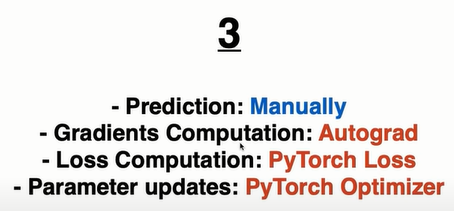

After that we also replace the manually computed model prediction by implementing a PyTorch model. Then PyTorch can do the complete pipline for us.

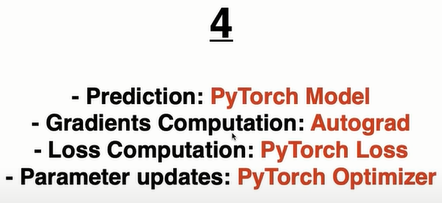

## General training pipeline in PyTorch

Typically we have three steps. 

### The first step is to design our model

We design the number of inputs and outputs, so we design input and output size. Then we also design the forward pass with all the different operations or all the different layers.

### Construct the loss and the optimizer 

### Training loop

We start by doing our forward pass, compute the prediction after that we do the backward pass where we get the gradients. PyTorch can do this for us, we only have to define or to design our model. After calculating the gradients we update our weights. After all training steps we iterate a couple of times until we are done.

## Example after steps one and two

In [7]:
import torch

# f = w * b

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


print(f"Prediction before training: f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero gradients 
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


## Example after steps three

In [8]:
import torch
import torch.nn as nn

# f = w * b

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
# SGD - Stochastic Gradient Descent
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients 
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


## Example after step four

In [24]:
import torch
import torch.nn as nn

# f = w * b

# f = 2 * x
# we need 2d array where number of rows is number of samples and number of columns is number of features
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape

# Linear model is one layer so it is provided by PyTorch, usually we have to design it
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

# training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
# SGD - Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients 
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")

Prediction before training: f(5) = -4.008
epoch 1: w = -0.585, loss = 53.93643188
epoch 11: w = 1.106, loss = 1.85920858
epoch 21: w = 1.392, loss = 0.48485419
epoch 31: w = 1.452, loss = 0.42387486
epoch 41: w = 1.475, loss = 0.39835560
epoch 51: w = 1.492, loss = 0.37514722
epoch 61: w = 1.507, loss = 0.35331118
epoch 71: w = 1.521, loss = 0.33274674
epoch 81: w = 1.535, loss = 0.31337923
epoch 91: w = 1.549, loss = 0.29513887
Prediction after training: f(5) = 9.096


## Example with custom dummy model

In [26]:
import torch
import torch.nn as nn

# f = w * b

# f = 2 * x
# we need 2d array where number of rows is number of samples and number of columns is number of features
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape

# Linear model is one layer so it is provided by PyTorch, usually we have to design it
input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

# dummy example
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

# training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
# SGD - Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients 
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")

Prediction before training: f(5) = -2.418
epoch 1: w = 0.012, loss = 49.14630508
epoch 11: w = 1.620, loss = 1.27894104
epoch 21: w = 1.880, loss = 0.04006638
epoch 31: w = 1.924, loss = 0.00760770
epoch 41: w = 1.933, loss = 0.00638542
epoch 51: w = 1.936, loss = 0.00599361
epoch 61: w = 1.938, loss = 0.00564421
epoch 71: w = 1.939, loss = 0.00531567
epoch 81: w = 1.941, loss = 0.00500628
epoch 91: w = 1.943, loss = 0.00471488
Prediction after training: f(5) = 9.886
